In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data = pd.read_excel("/content/prediction_data.xlsx", sheet_name="vw_ChurnData")
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multitple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,951,66834,0,0,63172,731512,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,4915,16905,0,10,12237,30142,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,11605,82975,4257,110,187298,1023791,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,844,59693,0,0,21939,618869,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,726,408435,0,140,33208,455643,Stayed,Others,Others


In [111]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multitple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  6007 non-null   object
 1   Gender                       6007 non-null   object
 2   Age                          6007 non-null   int64 
 3   Married                      6007 non-null   object
 4   State                        6007 non-null   object
 5   Number_of_Referrals          6007 non-null   int64 
 6   Tenure_in_Months             6007 non-null   int64 
 7   Value_Deal                   2710 non-null   object
 8   Phone_Service                6007 non-null   object
 9   Multitple_Lines              6007 non-null   object
 10  Internet_Service             6007 non-null   object
 11  Internet_Type                4784 non-null   object
 12  Online_Security              6007 non-null   object
 13  Online_Backup                6007

## Menghilangkan data null dan duplikasi

In [113]:
data.isna().sum()

,0
Customer_ID,0
Gender,0
Age,0
Married,0
State,0
Number_of_Referrals,0
Tenure_in_Months,0
Value_Deal,3297
Phone_Service,0
Multitple_Lines,0


In [114]:
data['Internet_Type'].unique()

array(['Fiber Optic', 'DSL', 'Cable', nan], dtype=object)

In [115]:
data['Internet_Type'] = data['Internet_Type'].fillna("")

In [116]:
data['Value_Deal'] = data['Value_Deal'].fillna("")

In [117]:
sum(data.isna().sum())

0

In [118]:
data.duplicated().sum()

np.int64(0)

In [119]:
data.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6.007000e+03
mean,47.289163,7.439820,17.39454,3551.820043,134401.452139,190.901282,7.015149,60382.046779,2.697866e+05
std,16.805110,4.622369,10.59292,3682.220799,196257.183247,782.153830,25.405737,80211.314796,2.833262e+05
min,18.000000,0.000000,1.00000,-10.000000,20.000000,0.000000,0.000000,0.000000,1.100000e+02
25%,33.000000,3.000000,8.00000,644.500000,9568.000000,0.000000,0.000000,3350.000000,3.893900e+04
50%,47.000000,7.000000,17.00000,1145.000000,43268.000000,0.000000,0.000000,21547.000000,1.584840e+05
75%,60.000000,11.000000,27.00000,7095.000000,161285.000000,0.000000,0.000000,90790.000000,4.386600e+05
max,84.000000,15.000000,36.00000,11875.000000,867245.000000,4979.000000,150.000000,356472.000000,1.197934e+06


## Data Processing

Model yang akan digunakan adalah RandomTree, disarankan untuk :


*   Menggunakan Label Encoder daripada One-Hot-Encoder
*   tidak menggunakan scallin

In [120]:
# pisahkan kolom yang tidak akan digunakdaan
data_use = data.drop(["Customer_ID", "Churn_Category", "Churn_Reason"], axis=1)

In [121]:
data_use.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multitple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,Yes,...,Two Year,No,Bank Withdrawal,951,66834,0,0,63172,731512,Stayed
1,Male,51,No,Punjab,5,9,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,4915,16905,0,10,12237,30142,Churned
2,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,Yes,...,Two Year,Yes,Bank Withdrawal,11605,82975,4257,110,187298,1023791,Stayed
3,Male,35,No,Maharashtra,10,12,,Yes,No,Yes,...,Two Year,Yes,Credit Card,844,59693,0,0,21939,618869,Stayed
4,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,Yes,...,Two Year,Yes,Credit Card,726,408435,0,140,33208,455643,Stayed


In [122]:
# buat list untuk kolom yang akan di-encoding
columns_to_encode = ["Gender", "Married", "State", "Value_Deal", "Phone_Service", "Multitple_Lines",
                     "Internet_Service", "Internet_Type" ,"Online_Security", "Online_Backup",
                     "Device_Protection_Plan", "Premium_Support", "Streaming_TV", "Streaming_Movies",
                     "Streaming_Music", "Unlimited_Data", "Contract", "Paperless_Billing", "Payment_Method"
                     ]

In [123]:
# encode kolom kategori kecuali kolom target
label_encoders = {}
for column in columns_to_encode:
  label_encoders[column] = LabelEncoder()
  data_use[column] = label_encoders[column].fit_transform(data_use[column])

# encode data target secara manual
data_use["Customer_Status"] = data_use["Customer_Status"].map({"Stayed": 0, "Churned": 1})

In [124]:
data_use.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multitple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,30,1,11,0,31,1,1,0,1,...,2,0,0,951,66834,0,0,63172,731512,0
1,1,51,0,15,5,9,5,1,0,1,...,0,1,0,4915,16905,0,10,12237,30142,1
2,0,43,1,21,3,28,1,1,1,1,...,2,1,0,11605,82975,4257,110,187298,1023791,0
3,1,35,0,12,10,12,0,1,0,1,...,2,1,1,844,59693,0,0,21939,618869,0
4,1,75,1,17,12,27,2,1,0,1,...,2,1,1,726,408435,0,140,33208,455643,0


In [125]:
data_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Gender                       6007 non-null   int64
 1   Age                          6007 non-null   int64
 2   Married                      6007 non-null   int64
 3   State                        6007 non-null   int64
 4   Number_of_Referrals          6007 non-null   int64
 5   Tenure_in_Months             6007 non-null   int64
 6   Value_Deal                   6007 non-null   int64
 7   Phone_Service                6007 non-null   int64
 8   Multitple_Lines              6007 non-null   int64
 9   Internet_Service             6007 non-null   int64
 10  Internet_Type                6007 non-null   int64
 11  Online_Security              6007 non-null   int64
 12  Online_Backup                6007 non-null   int64
 13  Device_Protection_Plan       6007 non-null   int

pastikan data tidak imbalance (minimal lebih dari 10% dari data adalah churn)

In [126]:
data_use["Customer_Status"].value_counts()

,count
Customer_Status,
0,4275
1,1732


In [127]:
# Split data untuk features dan target
X = data_use.drop("Customer_Status", axis=1)
y = data_use["Customer_Status"]

In [128]:
# Split data untuk latihan/training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## RandomForest Model Training ke-1

In [129]:
rf_model_1 = RandomForestClassifier(n_estimators=100) # n_estimators = jumlah decision tree untuk forest model
rf_model_1.fit(X_train, y_train)

RandomForestClassifier()

## Evaluasi Model

Confusion Matrix:
[[796  60]
 [135 211]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       856
           1       0.78      0.61      0.68       346

    accuracy                           0.84      1202
   macro avg       0.82      0.77      0.79      1202
weighted avg       0.83      0.84      0.83      1202



/tmp/ipython-input-2296346349.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[indices], y=X.columns[indices], palette="Spectral")


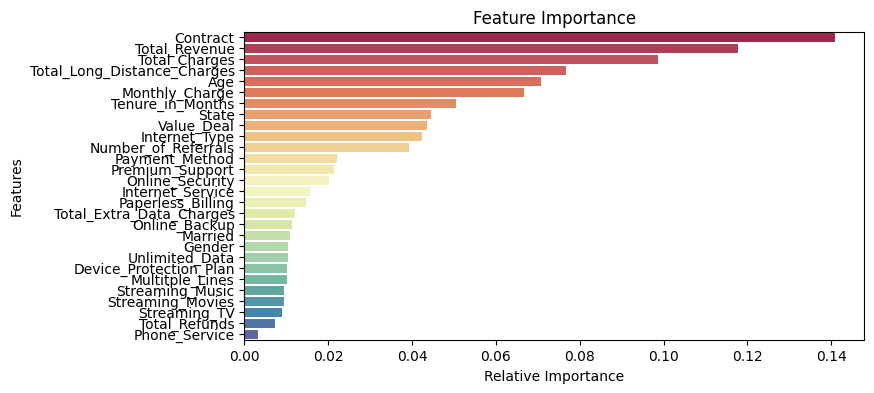

In [130]:
# buat prediksi
y_pred = rf_model_1.predict(X_test)

# evaluasi hasil prediksi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Seleksi Feature menggunakan Feature Importance
importance = rf_model_1.feature_importances_
indices = np.argsort(importance)[::-1]

# Plot Feature Importance
plt.figure(figsize=(8, 4))
plt.title("Feature Importance")
sns.barplot(x=importance[indices], y=X.columns[indices], palette="Spectral")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()


In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(4, 2))
plt.xlabel('Predicted')
plt.ylabel('Actual')

Catatan:

Untuk mengkaji ulang model supaya mendapatkan hasil yang lebih baik, disarankan untuk menghilangkan Features yang memiliki Relative Importance dibawah **0.01**, supaya menghilangkan bias dan model bisa fokus ke data-data yang penting

Dalam kasus ini berarti "Paperless_Billing" sampai "Phone Service" bisa dihilangkan.

In [132]:
importance_data_use = data_use.drop(["Paperless_Billing", "Online_Backup", "Device_Protection_Plan",
                        "Total_Extra_Data_Charges", "Unlimited_Data", "Married", "Streaming_Music", "Gender",
                        "Streaming_TV", "Multitple_Lines", "Streaming_Movies", "Total_Refunds", "Phone_Service"], axis=1)

In [133]:
importance_data_use.columns

Index(['Age', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Internet_Service', 'Internet_Type', 'Online_Security',
       'Premium_Support', 'Contract', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue',
       'Customer_Status'],
      dtype='object')

In [134]:
# Split data untuk features dan target
X = importance_data_use.drop("Customer_Status", axis=1)
y = importance_data_use["Customer_Status"]

# Split data untuk latihan/training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [135]:
X_train.columns

Index(['Age', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Internet_Service', 'Internet_Type', 'Online_Security',
       'Premium_Support', 'Contract', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue'],
      dtype='object')

## Tuning Random Forest

Tuning akan menggunakan 3 metode:


1.   Grid Search
2.   Random Search
3.   Optuna(Bayesian Optimization)



In [136]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features':['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [137]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=2)


In [138]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Estimator:", random_search.best_estimator_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
Best Estimator: RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       min_samples_leaf=2)


In [28]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.2 MB/s eta 0:00:00


In [139]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# buat objective function
def objective(trial):
    # hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    # Create and fit random forest model
    model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    bootstrap=bootstrap
    )
    model.fit(X_train, y_train)

    # Make predictions and calculate RMSE
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Return MAE
    return mae

In [ ]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20, show_progress_bar=True)

In [141]:
# Print the best set of hyperparameters
print('Best hyperparameters: ', study.best_params)
# Print the corresponding performance
print('Best performance: ', study.best_value)

Best hyperparameters:  {'n_estimators': 47, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}
Best performance:  0.2237936772046589


In [ ]:
study_min = optuna.create_study(direction='minimize')
study_min.optimize(objective, n_trials=100, show_progress_bar=True)

In [143]:
print('Best hyperparameters: ', study_min.best_params)
print('Best performance: ', study_min.best_value)

Best hyperparameters:  {'n_estimators': 50, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}
Best performance:  0.17637271214642264


In [144]:
print("Random Search")
print("Best Parameters:", random_search.best_params_)
print("Best Estimator:", random_search.best_estimator_)

print("Grid Search:")
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

print("Optuna Max")
print('Best hyperparameters: ', study.best_params)
print('Best performance: ', study.best_value)

print("Optuna Min")
print('Best hyperparameters: ', study_min.best_params)
print('Best performance: ', study_min.best_value)

Random Search
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
Best Estimator: RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       min_samples_leaf=2)
Grid Search:
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=2)
Optuna Max
Best hyperparameters:  {'n_estimators': 47, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}
Best performance:  0.2237936772046589
Optuna Min
Best hyperparameters:  {'n_estimators': 50, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}
Best performance:  0.17637271214642264


In [145]:
random_model = RandomForestClassifier(n_estimators=100,
                                      max_depth=20,
                                      max_features="log2",
                                      min_samples_leaf=2,
                                      min_samples_split=2,
                                      bootstrap=False)
grid_model = RandomForestClassifier(n_estimators=100,
                                      max_depth=10,
                                      max_features="log2",
                                      min_samples_leaf=2,
                                      min_samples_split=2,
                                      bootstrap=False)
optunaMax_model = RandomForestClassifier(n_estimators=47,
                                      max_depth=2,
                                      max_features="sqrt",
                                      min_samples_leaf=5,
                                      min_samples_split=10,
                                      bootstrap=False)
optunaMin_model = RandomForestClassifier(n_estimators=50,
                                      max_depth=30,
                                      max_features="sqrt",
                                      min_samples_leaf=2,
                                      min_samples_split=2,
                                      bootstrap=False)

In [146]:
random_model.fit(X_train, y_train)
grid_model.fit(X_train, y_train)
optunaMax_model.fit(X_train, y_train)
optunaMin_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       n_estimators=50)

In [147]:
# buat function untuk evaluasi model
def model_evaluation(model):
  y_pred = model.predict(X_test)

  # evaluasi hasil prediksi
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))

In [148]:
model_evaluation(random_model)

Confusion Matrix:
[[774  91]
 [126 211]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       865
           1       0.70      0.63      0.66       337

    accuracy                           0.82      1202
   macro avg       0.78      0.76      0.77      1202
weighted avg       0.81      0.82      0.82      1202



In [149]:
model_evaluation(grid_model)

Confusion Matrix:
[[777  88]
 [133 204]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       865
           1       0.70      0.61      0.65       337

    accuracy                           0.82      1202
   macro avg       0.78      0.75      0.76      1202
weighted avg       0.81      0.82      0.81      1202



In [150]:
model_evaluation(optunaMax_model)

Confusion Matrix:
[[854  11]
 [255  82]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       865
           1       0.88      0.24      0.38       337

    accuracy                           0.78      1202
   macro avg       0.83      0.62      0.62      1202
weighted avg       0.80      0.78      0.73      1202



In [151]:
model_evaluation(optunaMin_model)

Confusion Matrix:
[[773  92]
 [132 205]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       865
           1       0.69      0.61      0.65       337

    accuracy                           0.81      1202
   macro avg       0.77      0.75      0.76      1202
weighted avg       0.81      0.81      0.81      1202



## Prediksi Data Baru

In [152]:
new_data = pd.read_excel("/content/prediction_data.xlsx", sheet_name="vw_JoinDataChurn")
new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multitple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,Mailed Check,243,3845,0,0,0,3845,Joined,Others,Others
1,12056-WES,Male,27,No,West Bengal,2,20,NaN,Yes,No,...,Bank Withdrawal,904,26845,0,0,9444,36289,Joined,Others,Others
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,...,Bank Withdrawal,199,199,0,0,1183,3173,Joined,Others,Others
3,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,Credit Card,1955,1955,0,0,102,2975,Joined,Others,Others
4,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,Credit Card,628,628,0,0,4219,10499,Joined,Others,Others


In [153]:
new_data = new_data.drop(["Paperless_Billing", "Online_Backup", "Device_Protection_Plan",
                        "Total_Extra_Data_Charges", "Unlimited_Data", "Married", "Streaming_Music", "Gender",
                        "Streaming_TV", "Multitple_Lines", "Streaming_Movies", "Total_Refunds", "Phone_Service"], axis=1)

In [154]:
# hilangkan data yang tidak diperlukan
new_data = new_data.drop(["Customer_ID", "Churn_Category", "Churn_Reason", "Customer_Status"], axis=1)

In [42]:
new_data.isnull().sum()

,0
Age,0
State,0
Number_of_Referrals,0
Tenure_in_Months,0
Value_Deal,0
Internet_Service,0
Internet_Type,0
Online_Security,0
Premium_Support,0
Contract,0


In [155]:
new_data['Internet_Type'] = new_data['Internet_Type'].fillna("")
new_data['Value_Deal'] = new_data['Value_Deal'].fillna("")

In [156]:
original_new_data = new_data.copy()

In [157]:
importance_data_use = data_use.drop(["Paperless_Billing", "Online_Backup", "Device_Protection_Plan",
                        "Total_Extra_Data_Charges", "Unlimited_Data", "Married", "Streaming_Music", "Gender",
                        "Streaming_TV", "Multitple_Lines", "Streaming_Movies", "Total_Refunds", "Phone_Service"], axis=1)

In [158]:
X_test.columns

Index(['Age', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Internet_Service', 'Internet_Type', 'Online_Security',
       'Premium_Support', 'Contract', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue'],
      dtype='object')

In [159]:
new_data.columns

Index(['Age', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Internet_Service', 'Internet_Type', 'Online_Security',
       'Premium_Support', 'Contract', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue'],
      dtype='object')

In [160]:
# encoding kolom teks kedalam numerikal
teks_data = new_data.select_dtypes(include=["object"]).columns

for column in teks_data:
  new_data[column] = label_encoders[column].transform(new_data[column])

# Buat prediksi
new_predictions = optunaMin_model.predict(new_data)

# Tambahkan hasil prediksi kedalam DataFrame original
original_new_data["Customer_Status_Prediction"] = new_predictions

# Filter DataFrame yang hanya menyajikan data sebagai churned
original_new_data = original_new_data[original_new_data["Customer_Status_Prediction"] == 1]

In [161]:
# simpan hasil
original_new_data.to_excel("prediction_result.xlsx", index=False)

In [162]:
# simpan model
from joblib import dump, load
file = "optunaMin_model.joblib"
dump(optunaMin_model, file)
print("Selesai")

Selesai
